# 분류(Classification)
## 4.3 앙상블 
* 앙상블 학습법은 여러개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 예측을 도출하는 기법
* 협업, 오케스트라연주로 이해하면 됨

### 앙상블 학습의 유형
   * Voting방식 : 서로 다른 유형의 분류기가 예측을 수행후 그 예측값들 중 가장 많이 나온것을 채택(다수결)
   * Bagging방식 : 각각의 분류기가 서로 동일한 유형의 알고리즘이지만, 데이터샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅하는데 
     채택하는 방식은 소프트보팅(각각 분류기의 예측값들의 평균값), 하드보팅(다수결의 원칙)
   * Boosting방식
     - 그래디언부스팅, XGBoost, Light GBM

### 보팅분류기(Voting Classifier)
* 사이킷런에서 제공하는 보팅 방식의 앙상블을 구현한 Voting Classifier클래스를 통해 로지스틱회귀와 KNN을 기반으로 보팅분류기 생성

**라이브러리 로드 및 유방암데이터 세트 로드**

In [5]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

In [19]:
data_df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


**소프트 보팅방식으로 로직스틱회귀와 KNN기반으로 보팅 분류기 생성**

In [27]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 8)

# 개별 모델을 소프트 보팅 기반으리 양상ㅂㄹ 모델로 구현한 분류기
# estimator에 인자 던질때 help문서 참조
# 안 그러면 에러가 이렇게 나네. -- TypeError: 'LogisticRegression' object is not iterable
vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')  # 디폴트값은 hard

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

# VotingClassifier로 학습/예측/평가 수행
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)

Voting분류기 정확도 : 0.9474


In [28]:
help(vo_clf)

Help on VotingClassifier in module sklearn.ensemble._voting object:

class VotingClassifier(sklearn.base.ClassifierMixin, _BaseVoting)
 |  VotingClassifier(estimators, *, voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False)
 |  
 |  Soft Voting/Majority Rule classifier for unfitted estimators.
 |  
 |  .. versionadded:: 0.17
 |  
 |  Read more in the :ref:`User Guide <voting_classifier>`.
 |  
 |  Parameters
 |  ----------
 |  estimators : list of (str, estimator) tuples
 |      Invoking the ``fit`` method on the ``VotingClassifier`` will fit clones
 |      of those original estimators that will be stored in the class attribute
 |      ``self.estimators_``. An estimator can be set to ``'drop'``
 |      using ``set_params``.
 |  
 |      .. versionchanged:: 0.21
 |          ``'drop'`` is accepted.
 |  
 |      .. deprecated:: 0.22
 |         Using ``None`` to drop an estimator is deprecated in 0.22 and
 |         support will be dropped in 0.24. Use the strin

**개별 모델의 학습/예측/평가**

In [30]:
print("Voting분류기 정확도 : {0:.4f}".format(accuracy_score(y_test, pred)))
classifiers = [lr_clf, knn_clf]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print("{0} 정확도 : {1:.4f}".format(class_name, accuracy_score(y_test, pred)))

Voting분류기 정확도 : 0.9386
LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9386


# 4.4 렌덤포레스트

## 랜덤포레스트의 개요와 실습
* 같은 알고리즘으로 여러개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘.(현실 세계의 정치에서 행하는 행위)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import load_datasets

# 결정트리에서 사용한 get_human_datasets()를 이용해 학습/데이터세트 데이터 프레임 변환
X_train, X_test, y_train, y_test = load_datasets.get_human_dataset()

# 랜덤 포레스트 하습 및 별도의 테스트 세트로 예측/성능 /평가
rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("랜덤 포레스트 정확도 : {0:.4f}".format(accuracy))

랜덤 포레스트 정확도 : 0.9253


**GridSearchCV를 이용해 랜덤포레스트의 하이퍼 파라미터 튜닝**

In [52]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100],
         'max_depth': [6, 8, 10, 12],
         'min_samples_leaf': [8, 12, 18],
         'min_samples_split': [8, 16, 20]
         }

# RandomForestClassifier객체 생성 후 GridSearchCV수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = 1)
gridCV = GridSearchCV(estimator = rf_clf, param_grid = params, cv = 2, n_jobs = 1)
gridCV.fit(X_train, y_train)

print("최적 하이퍼 파라미터 : \n", gridCV.best_params_)
print("최고 예측 정확도 : \n {0:.4f}".format(gridCV.best_score_))

최적 하이퍼 파라미터 : 
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 : 
 0.9180


**n_estimators = 300으로 재수행**
* 나머지 파라미터는 위의 파라미터로 재수행

In [55]:
rf_clf = RandomForestClassifier(n_estimators = 300, max_depth = 10, min_samples_leaf = 8, min_samples_split = 8, random_state = 0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print("예측 정확도 : \n {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도 : 
 0.9165


**피처 중요도에 대한 시각화**

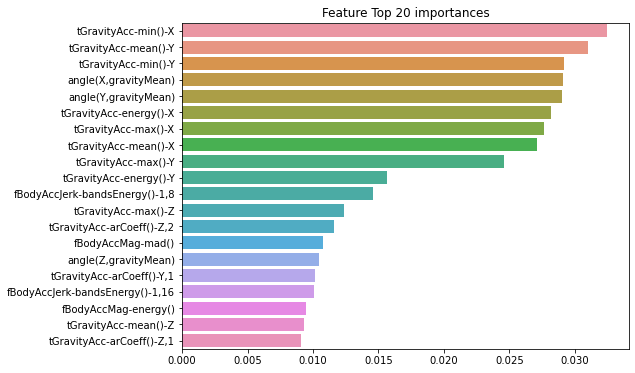

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importance_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importance_values, index = X_train.columns)

ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize = (8, 6))
plt.title("Feature Top 20 importances")
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

**tGravityAcc-min()-X, tGravityAcc-mean()-Y, tGrativityAcc-min()-Y등이 높은 피처 중요도를 갖음**

## 4.5 GBM(Gradient Boosting Machine)
* GBM은 약한 학습기를 순차적으로 학습시키면면서 예측시에 잘못 분류된 데이터에 대해서 가중치를 부여를 통해 오류를 개선시키는 방식
* 가장 대표적인 구현은 Ada Boost(Adaptive Boosting)방식이며,이와 비슷하지만 오류값을 순차 학습시키면서 최소화하는 방식으로 진행하는 경사하강법(Gradient Decent)방식이 있다.

### GBM을 이용해 사용자 행동 데이터세트 예측 분류

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
import load_datasets
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = load_datasets.get_human_dataset()

In [67]:
# GBM 수행시간 측정을 위함 시작시간 설정
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print("GBM정확도 : {0:.4f}".format(gb_accuracy))
print("GBM수행시간 : {0:.1f}".format(time.time() - start_time))

GBM정확도 : 0.9389
GBM수행시간 : 2617.9


**본인 PC환경 : 총걸린시간: 2617초.ㅠㅠ ( 메모리 4GB, CPU코어 2)**

In [68]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special

### GBM 하이퍼 파라미터 및 튜닝
* loss : GD(Gradient Decent)에서 사용할 비용함수를 지정.특별한 이유가 없는한 기본값이 `deviance`를 그대로 적용
* learning_rate : GBM이 학습을 진행할때마다 적용하는 학습률.(오류값을 보정해 나가는데 적용하는 계수.0과 1사이의 값이며 기본값은 0.1)
* `n_estimators` : 약한 학습기의 갯수를 의미.weak learner가 순차적으로 오류를 보정하므로 개수가 많을수로고 예측성능이 일정 수준까지는 좋아질수있습닏. 하지만 갯수가 많을수록 수행 시간이 오래 걸립니다. 기본값 100
* `subsample` : weak learner가 학습에 사용하는 데이터샘플링 비율: 기본값은 1이며, 이는 전체 학습 데이터를 기반으로 학습한다는 의미.

### GridSearchCV를 이용한 하이터 파라미터 튜닝

In [70]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 500],
    'learning_rate': [0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid = params, cv =2, verbose = 1)
grid_cv.fit(X_train, y_train)
print("최적 하이터 파라미터: \n", grid_cv.best_params_)
print("최고 예측 정확도: {0:.4f}".format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

**위에서 도출된 최적의 파라미터를 그대로 적용**

In [ ]:
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_sore(y_test, gb_pred)
print("GBM정확도 : {0:.4f}".format(gb_accuracy))

### 정리 

* GBM은 과적합에도 강한 뛰어난 예측 성능을 가진 알고리즘이다. 하지만 수행시간이 오래 걸린다는 단점이 있다.
* 앙상브리법은 대표적으로 배깅과 부스팅으로 구분될 수 있으며, 배깅방식은 학습 데이터를 중복허용하면서 다수이 세트로 샘플링하여 이를 다수의 약한 학습기가 학습한 뒤 최종 결과를 결합해 예측하는 방식
* 대표적인 배깅방식이 랜덤 포레스트로서, 랜덤포레스트는 수행시간이 빠르고 비교적 안정적인 예측 성능을 제공하는 훌률한 머신러닝 알고리즘.